In [1]:
import PyPDF2
import os
import nltk
from nltk.book import*
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd
import numpy as np
from gensim.summarization import keywords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import string
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.layers.convolutional import GlobalMaxPooling1D
from numpy import array
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import KeyedVectors
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras import layers
from tensorflow.python.framework import ops
ops.reset_default_graph()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Question 1: any cause for concerns for these warnings above?

In [5]:
equities_reviews = pd.read_csv('equitylinestrain_v2.csv')
equities_reviews.isnull().values.any()
equities_reviews.shape

(258, 12)

In [6]:
equities_reviews.head()

,Serial_Number,sentences,classification,sentiment,topic,class2,Unnamed: 6,1 (conclusion),2 (guidance),3 (risk),4 (legal),5 (nonversation)
0,0,brewers singapore thai beverage february...,5,positive,1,legal,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"however, kgi securities makes no representatio...",4,neutral,2,conclusion,NaN,NaN,NaN,NaN,NaN,NaN
2,2,we have yet to see a meaningful improvement.,1,negative,3,risk,NaN,NaN,NaN,NaN,NaN,NaN
3,3,reports relating to a specific geographical ar...,4,positive,4,nonversation,NaN,NaN,NaN,NaN,NaN,NaN
4,4,whilst every effort is made to ensure that sta...,4,negative,5,guidance,NaN,NaN,NaN,NaN,NaN,NaN


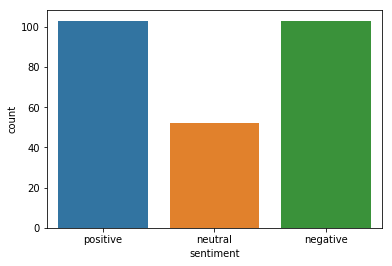

In [8]:
import seaborn as sns
sns.countplot(x='sentiment', data = equities_reviews)

In [9]:
# preprocess text to remove HTML, punctuations etc.

def preprocess_text(sen):
    # remove HTML tags
    sentence = remove_tags(sen)
    
    # remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    # single character removal
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    
    # remove multiple spaces
    sentence = re.sub(r'/s+', ' ', sentence)
    
    return sentence

In [10]:
tag_re = re.compile(r'[^>]+>')

def remove_tags(text):
    return tag_re.sub('', text)

In [11]:
x = []
sentence = list(equities_reviews['sentences'])

for sen in sentence:
    x.append(preprocess_text(sen))

x[4]

'whilst every effort is made to ensure that statements of facts made in this report are accurate  all estimates  projections  forecasts  expressions of opinion and other subjective judgments contained in this report are based on assumptions considered to be reasonable as of the date of the document in which they are contained and must not be construed as representation that the matters referred to therein will occur '

In [12]:
# replacing sentiments into digits
# negative = 0
# neutral = 1
# positive = 2

y = equities_reviews['sentiment']

y = np.array(list(map(lambda x: 0 if x == "positive" else (1 if x == 'neutral' else 2), y)))


In [14]:
# create training and testing data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [15]:
# creating word to index dictionary

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(X_train) # lists of text to train on

In [16]:
tokenizer.word_index

{'the': 1,
 'or': 2,
 'of': 3,
 'to': 4,
 'in': 5,
 'and': 6,
 'this': 7,
 'report': 8,
 'any': 9,
 'securities': 10,
 'not': 11,
 'cimb': 12,
 'is': 13,
 'research': 14,
 'be': 15,
 'cgs': 16,
 'may': 17,
 'certified': 18,
 'excellent': 19,
 'as': 20,
 'for': 21,
 'good': 22,
 'by': 23,
 'very': 24,
 'with': 25,
 'a': 26,
 'phillip': 27,
 'such': 28,
 'information': 29,
 'an': 30,
 'other': 31,
 'singapore': 32,
 'investment': 33,
 'its': 34,
 'financial': 35,
 'from': 36,
 'are': 37,
 'on': 38,
 'company': 39,
 'limited': 40,
 'have': 41,
 'that': 42,
 'thai': 43,
 'persons': 44,
 'their': 45,
 'including': 46,
 'has': 47,
 'reports': 48,
 'declared': 49,
 'time': 50,
 'no': 51,
 'person': 52,
 'india': 53,
 'related': 54,
 'market': 55,
 'beverage': 56,
 'but': 57,
 'does': 58,
 'it': 59,
 'at': 60,
 'which': 61,
 'www': 62,
 'should': 63,
 'subject': 64,
 'mentioned': 65,
 'all': 66,
 'february': 67,
 'com': 68,
 'kong': 69,
 'only': 70,
 'services': 71,
 'kgi': 72,
 'ltd': 73,
 'i

In [17]:
X_train = tokenizer.texts_to_sequences(X_train) # turning list of texts into sequences
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
len(X_train)

206

In [25]:
# adding 1 to vocab_size because of reserved 0 index

vocab_size = len(tokenizer.word_index)+1

# setting max length of each list to 100. 
#For lists that have less than 100 words, zero is added until the list reaches max length.

max_length = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [26]:
vocab_size

1427

In [27]:
X_train.shape

(206, 100)

In [28]:
X_test.shape

(52, 100)

In [30]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('.\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [31]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [34]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

W0815 00:17:56.400995 23248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 00:17:56.458945 23248 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Should I be concerned about this warning?

In [35]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          142700    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 206,957
Trainable params: 64,257
Non-trainable params: 142,700
_________________________________________________________________
None


In [43]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 164 samples, validate on 42 samples
Epoch 1/10
164/164 [==============================] - 0s 652us/step - loss: -5.9294 - acc: 0.6280 - val_loss: -0.0724 - val_acc: 0.2381
Epoch 2/10
164/164 [==============================] - 0s 811us/step - loss: -5.9294 - acc: 0.6280 - val_loss: -0.1367 - val_acc: 0.2381
Epoch 3/10
164/164 [==============================] - 0s 615us/step - loss: -5.9293 - acc: 0.6280 - val_loss: -0.1876 - val_acc: 0.2381
Epoch 4/10
164/164 [==============================] - 0s 795us/step - loss: -5.9293 - acc: 0.6280 - val_loss: -0.2239 - val_acc: 0.2381
Epoch 5/10
164/164 [==============================] - 0s 859us/step - loss: -5.9293 - acc: 0.6280 - val_loss: -0.2487 - val_acc: 0.2381
Epoch 6/10
164/164 [==============================] - 0s 914us/step - loss: -5.9293 - acc: 0.6280 - val_loss: -0.2650 - val_acc: 0.2381
Epoch 7/10
164/164 [==============================] - 0s 865us/step - loss: -5.9292 - acc: 0.6280 - val_loss: -0.2719 - val_acc: 0.2381
Epo

In [44]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3430449366569519
Test Accuracy: 0.21153846268470472


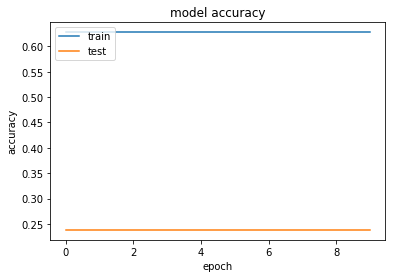

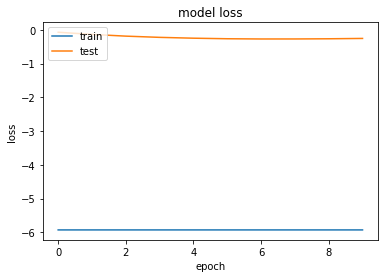

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Question: Training results are poor, as well as test accuracy. Is this due to the limited number of data that I got?

In [ ]:
# for loading of GloVe file, only if you need it.

import chakin

chakin.download(number=12, save_dir='./')